In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
!pip install optuna
import optuna
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
random_state = 17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.2 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2

In [ ]:
data = pd.read_excel('/content/значения Англ.xlsx', index_col = '№')
data = data.rename(columns={'Chloride content, mg/dm3 ': 'Chloride content', 'Sulfate content, mg/dm3 ' : 'Sulfate content', 'Compressive strength, MPa':'Compressive strength'})
data.head(90)

,Number of freeze-thaw cycles,Chloride content,Sulfate content,Number of wet-dry cycles,Compressive strength
№,,,,,
1,0,0,0.0,0,58.2
2,1,650,450.0,1,57.8
3,1,650,451.0,1,57.7
4,2,651,451.0,2,57.6
5,2,651,451.0,3,57.5
...,...,...,...,...,...
86,34,683,527.0,66,49.3
87,34,683,528.0,67,49.1
88,34,684,529.0,68,49.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 600
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of freeze-thaw cycles  600 non-null    int64  
 1   Chloride content              600 non-null    int64  
 2   Sulfate content               600 non-null    float64
 3   Number of wet-dry cycles      600 non-null    int64  
 4   Compressive strength          600 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 28.1 KB


In [ ]:
data.describe()

,Number of freeze-thaw cycles,Chloride content,Sulfate content,Number of wet-dry cycles,Compressive strength
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,124.075000,773.086667,620.591254,248.843333,41.496267
std,71.717816,78.413798,83.040296,148.570648,8.598902
min,0.000000,0.000000,0.000000,0.000000,28.500000
25%,61.000000,714.750000,563.750000,119.750000,34.000000
50%,120.000000,768.000000,626.000000,237.500000,40.200000
75%,187.250000,836.000000,690.250000,372.250000,48.725000
max,250.000000,900.000000,750.000000,500.000000,58.200000


In [ ]:
data.isnull().sum()

Number of freeze-thaw cycles    0
Chloride content                0
Sulfate content                 0
Number of wet-dry cycles        0
Compressive strength            0
dtype: int64

In [ ]:
X = data.drop('Compressive strength', axis = 1)
y = data['Compressive strength']

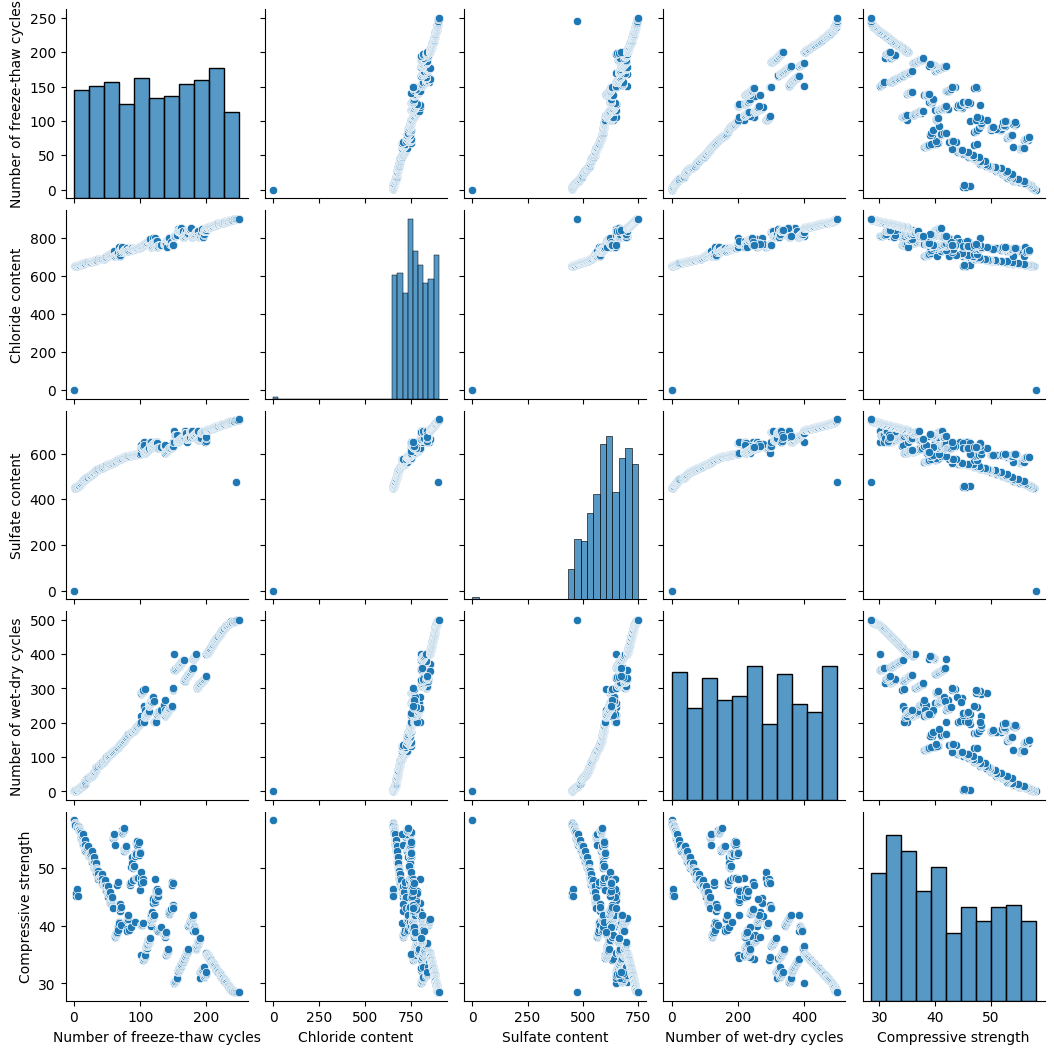

In [ ]:
sns.pairplot(data = data, height=2.14)

**Linear Correlation**

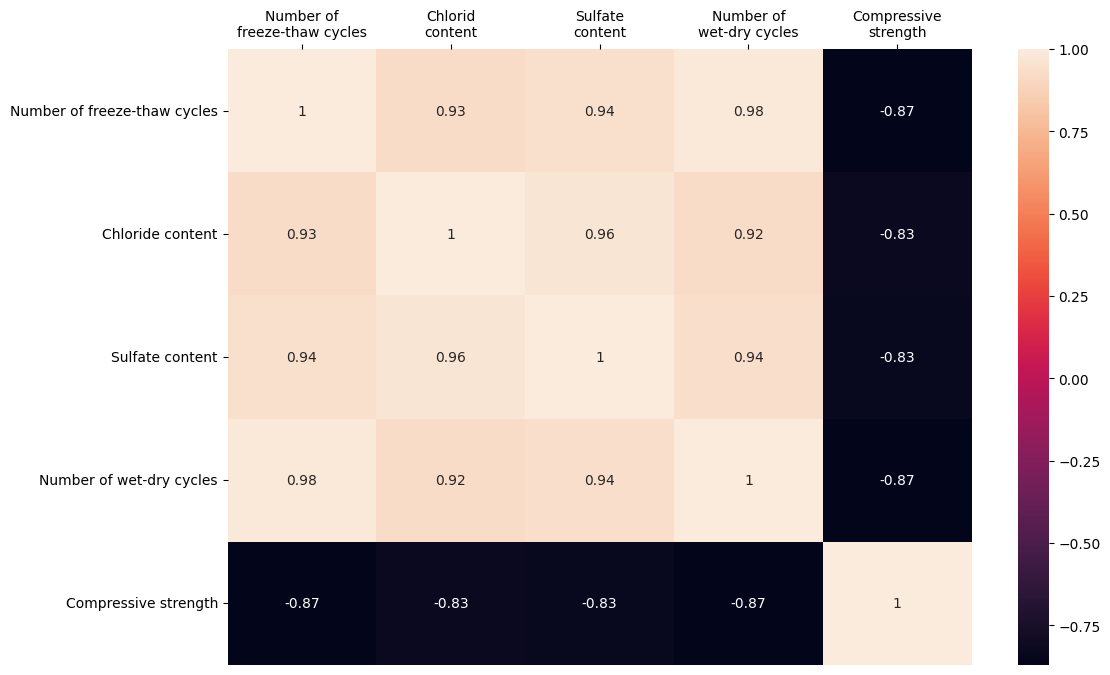

In [ ]:
corr = data.corr()
plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True, xticklabels = ['Number of\nfreeze-thaw cycles', 'Chlorid\ncontent', 'Sulfate\ncontent', 'Number of\nwet-dry cycles', 'Compressive\nstrength'])
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

**Non Linear Correlation**

interval columns not set, guessing: ['Number of freeze-thaw cycles', 'Chloride content', 'Sulfate content', 'Number of wet-dry cycles', 'Compressive strength']


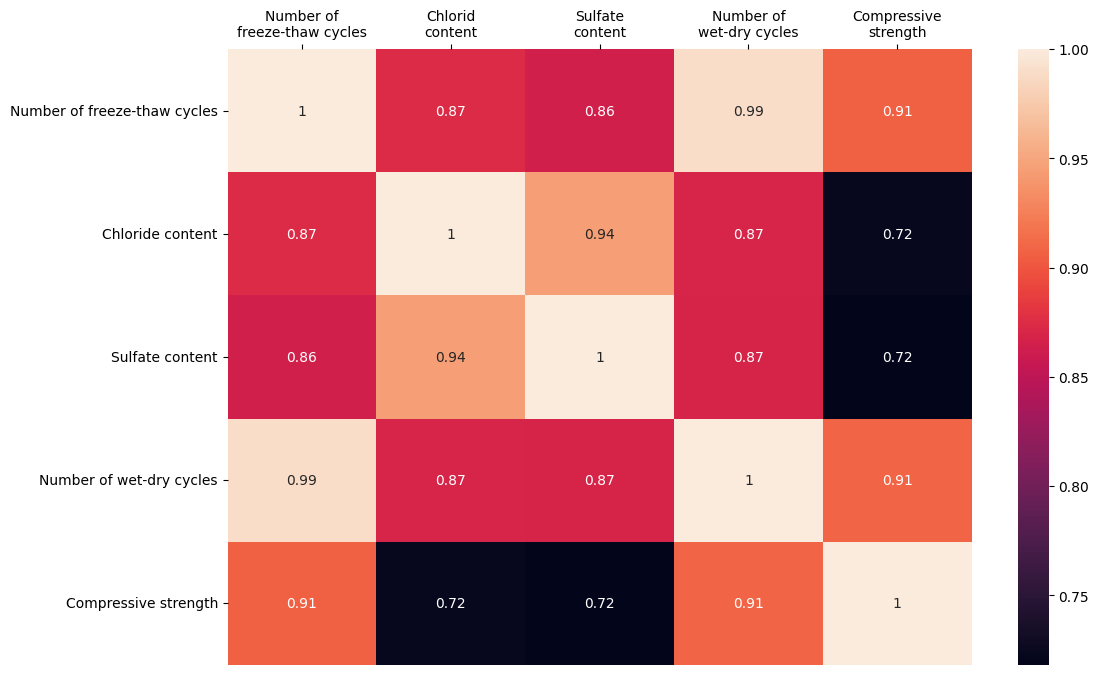

In [ ]:
phik_overview = data.phik_matrix()
plt.figure(figsize=(12, 8))
ax = sns.heatmap(phik_overview, annot=True, xticklabels = ['Number of\nfreeze-thaw cycles', 'Chlorid\ncontent', 'Sulfate\ncontent', 'Number of\nwet-dry cycles', 'Compressive\nstrength'])
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

**Differen clusters in 2d projection**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clusters.cluster_centers_[:, 1]

array([16.938475, -8.446079, -8.183548, 12.883195], dtype=float32)

<ipython-input-126-d84893315f96>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


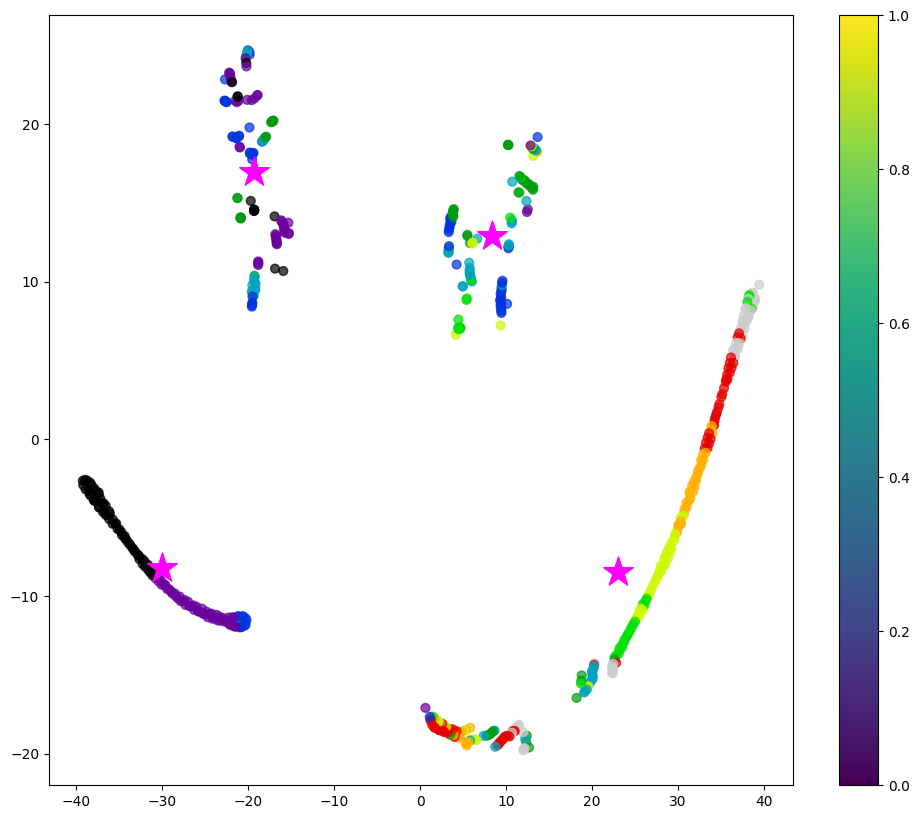

In [ ]:
tsne = TSNE(random_state=random_state)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
clusters = KMeans(n_clusters = 4, random_state = 67).fit(X_tsne)
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s=500, color = 'fuchsia', marker='*')
plt.colorbar()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 41)

In [ ]:
print('lenght train = {}, test = {}'.format(len(X_train), len(X_test)))

lenght train = 480, test = 120


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)


clusters = KMeans(n_clusters = 4, random_state = 67).fit(X_train)
X_train['Cluster'] = clusters.predict(X_train)
X_test['Cluster'] = clusters.predict(X_test)
print(len(X_train))

480


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Linear Regression + Standard Scaler




In [ ]:
pipe = Pipeline([('scl', StandardScaler()), ('lr',LinearRegression(fit_intercept = True))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
mae(pipe.predict(X_test), y_test)

3.1232158059006414

In [ ]:
linear_mse = mse(pipe.predict(X_test), y_test)
linear_rmse = np.sqrt(mse(pipe.predict(X_test), y_test))
linear_mae = mae(pipe.predict(X_test), y_test)
linear_r2 = r2(pipe.predict(X_test), y_test)
linear_mape = mape(pipe.predict(X_test), y_test)

In [ ]:
print('bias')
pipe.named_steps['lr'].intercept_

bias


41.599500000000006

In [ ]:
for x in zip(pipe.named_steps['lr'].coef_,X_train.columns):
  print(x)
print(pipe.named_steps['lr'].intercept_, 'bias')

(-3.5594012839933633, 'Number of freeze-thaw cycles')
(-1.3262896447863732, 'Chloride content')
(0.5355778379735119, 'Sulfate content')
(-3.218037057734623, 'Number of wet-dry cycles')
(0.4534404643767896, 'Cluster')
41.599500000000006 bias


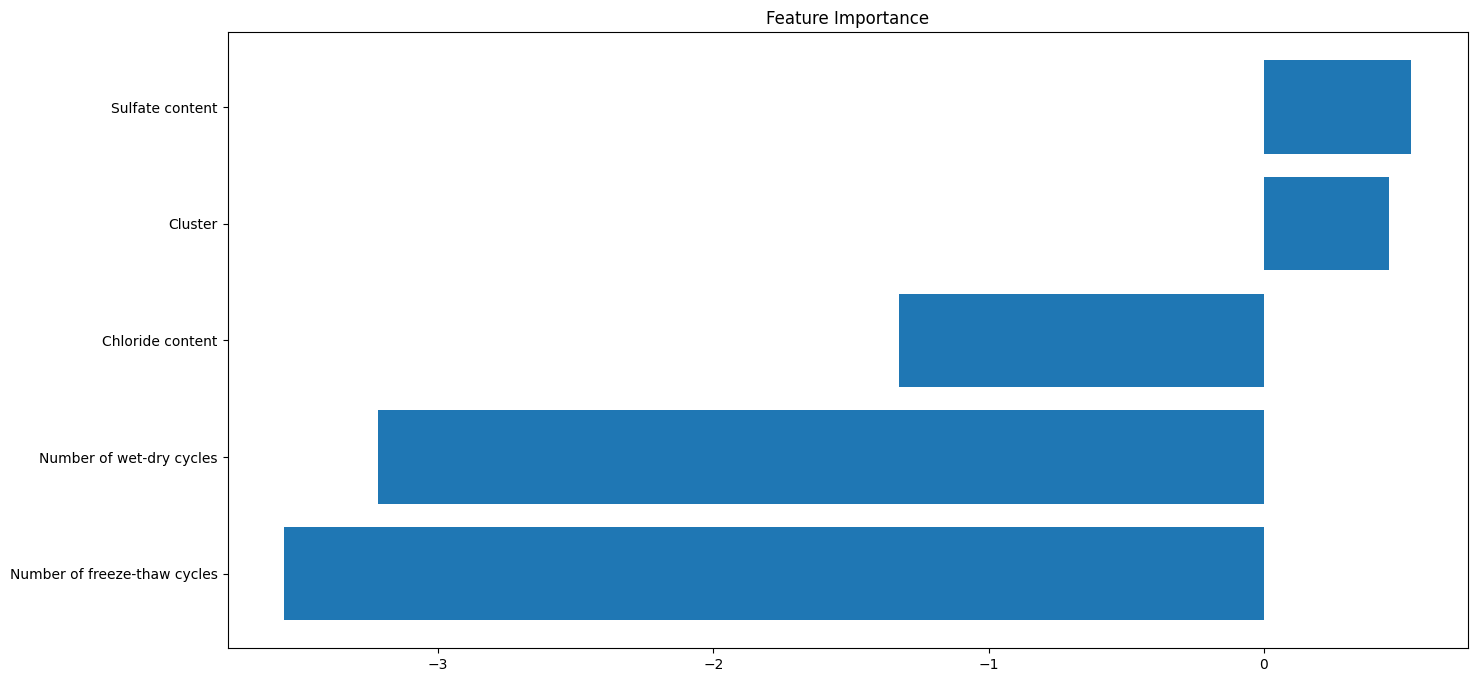

In [ ]:
feature_importance = pipe.named_steps['lr'].coef_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(16, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

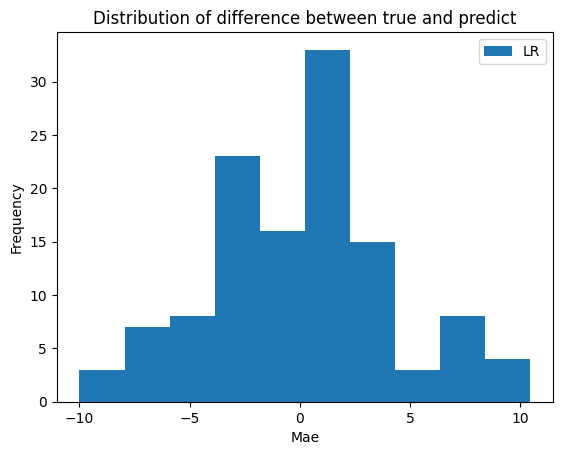

In [ ]:
plt.title('Distribution of difference between true and predict')
mae_vec = y_test - pipe.predict(X_test)
plt.hist(mae_vec, label = 'LR')
plt.legend()
plt.xlabel('Mae')
plt.ylabel('Frequency')
plt.show()

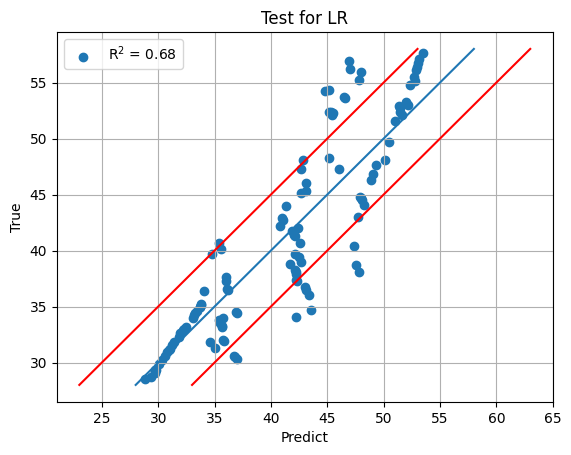

In [ ]:
plt.grid(True)

plt.title('Test for LR')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(pipe.predict(X_test), y_test, label = 'R$^2$ = {}'.format(round(linear_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_lr = pd.DataFrame()
scatter_lr['True'] = y_test
scatter_lr['Predict'] = pipe.predict(X_test)
scatter_lr.to_csv('scatter_lr.xlsx')

# SVR + optuna

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
    param = {

        'kernel' : trial.suggest_categorical('kernel', ['linear']),
        'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
        'C' : trial.suggest_float('C', 0.001, 30),

    }


    pipe_svr = Pipeline([('scl', StandardScaler()), ('lr',SVR(**param))])


    pipe_svr.fit(X_tr, y_tr)
    preds = pipe_svr.predict(X_val)
    metrics = mae(y_val, preds)
    return metrics

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

[I 2023-12-14 18:12:25,352] A new study created in memory with name: no-name-d820022d-8403-4a2d-9456-61110cb5740a
[I 2023-12-14 18:12:25,386] Trial 0 finished with value: 2.8179533192891575 and parameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 12.165372958686557}. Best is trial 0 with value: 2.8179533192891575.
[I 2023-12-14 18:12:25,434] Trial 1 finished with value: 3.1162250963190634 and parameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 27.118245216685416}. Best is trial 0 with value: 2.8179533192891575.
[I 2023-12-14 18:12:25,464] Trial 2 finished with value: 3.1537072347359936 and parameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 7.9813074776259345}. Best is trial 0 with value: 2.8179533192891575.
[I 2023-12-14 18:12:25,499] Trial 3 finished with value: 3.4584437475197647 and parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 18.713243652732963}. Best is trial 0 with value: 2.8179533192891575.
[I 2023-12-14 18:12:25,527] Trial 4 finished with value: 3.1539485301

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 150
Best trial:
  Value: 2.351163947132133
  Params: 
    kernel: linear
    gamma: auto
    C: 23.612835137934614


In [ ]:
pipe_svr = Pipeline([('scl', StandardScaler()), ('svr',SVR(kernel = 'linear', gamma = 'auto', C = 27.560927402431396))])
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('svr',
                 SVR(C=27.560927402431396, gamma='auto', kernel='linear'))])

In [ ]:
mae(pipe_svr.predict(X_test), y_test)

2.8575547442353373

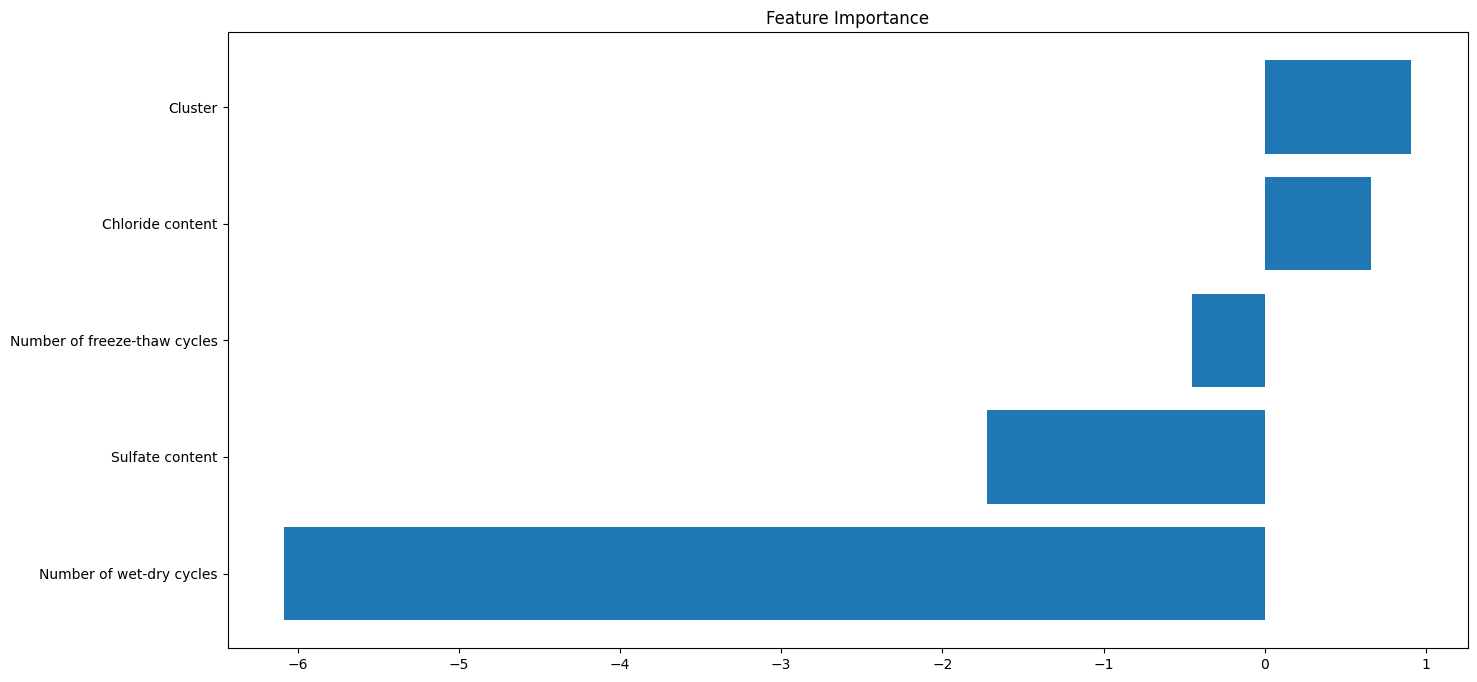

In [ ]:
feature_importance = pipe_svr.named_steps['svr'].coef_[0]
sorted_idx = np.argsort(feature_importance)
feature_importance = np.array(feature_importance)
fig = plt.figure(figsize=(16, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

In [ ]:
svr_mae = mae(pipe_svr.predict(X_test), y_test)
svr_mse = mse(pipe_svr.predict(X_test), y_test)
svr_rmse = np.sqrt(svr_mse)
svr_mape = mape(pipe_svr.predict(X_test), y_test)
svr_r2 = r2(pipe_svr.predict(X_test), y_test)

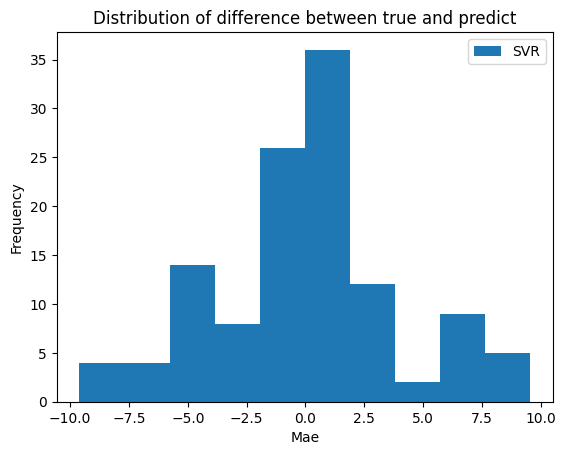

In [ ]:
plt.title('Distribution of difference between true and predict')
mae_vec = y_test - pipe_svr.predict(X_test)
plt.hist(mae_vec, label = 'SVR')
plt.legend()
plt.xlabel('Mae')
plt.ylabel('Frequency')
plt.show()

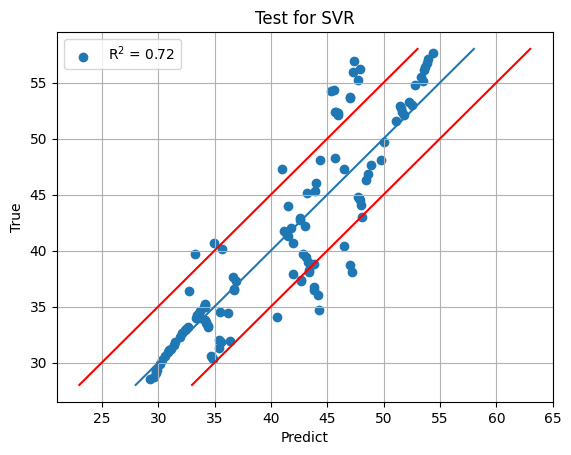

In [ ]:
plt.grid(True)

plt.title('Test for SVR')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(pipe_svr.predict(X_test), y_test, label = 'R$^2$ = {}'.format(round(svr_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()
scatter_svr = pd.DataFrame()
scatter_svr['True'] = y_test
scatter_svr['Predict'] = pipe_svr.predict(X_test)
scatter_svr.to_csv('scatter_svr.xlsx')

# Random forest + optuna

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

In [ ]:
def objective(trial):
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)


    param = {
        "max_depth": trial.suggest_int("max_depth", 10, 1500),
        'criterion' : trial.suggest_categorical('criterion', ['poisson', 'absolute_error', 'squared_error', 'friedman_mse']),
        'n_estimators' : trial.suggest_int('n_estimators', 10, 700),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 16, step = 2),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 2, 10, step = 2),
        'max_features' : trial.suggest_int('max_features', 1, 13, step = 1),
    }


    rfr = RandomForestRegressor(**param)

    rfr.fit(X_tr, y_tr)
    preds = rfr.predict(X_val)
    score = mae(y_val, preds)
    return score


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2023-11-15 17:55:06,006] A new study created in memory with name: no-name-e6d76fae-9ffb-42ad-b800-888489b2a6b6
[I 2023-11-15 17:55:07,189] Trial 0 finished with value: 2.144527852302614 and parameters: {'max_depth': 1170, 'criterion': 'friedman_mse', 'n_estimators': 476, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 11}. Best is trial 0 with value: 2.144527852302614.
[I 2023-11-15 17:55:07,431] Trial 1 finished with value: 1.6697904840497104 and parameters: {'max_depth': 411, 'criterion': 'friedman_mse', 'n_estimators': 46, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 8}. Best is trial 1 with value: 1.6697904840497104.
[I 2023-11-15 17:55:07,885] Trial 2 finished with value: 1.4858332224244588 and parameters: {'max_depth': 372, 'criterion': 'friedman_mse', 'n_estimators': 66, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 9}. Best is trial 2 with value: 1.4858332224244588.
[I 2023-11-15 17:55:14,298] Trial 3 finished with value: 1.

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


Number of finished trials: 50
Best trial:
  Value: 0.8456508008999166
  Params: 
    max_depth: 178
    criterion: poisson
    n_estimators: 282
    min_samples_split: 4
    min_samples_leaf: 2
    max_features: 10


In [ ]:
rfr = RandomForestRegressor(max_depth=178, criterion='poisson',n_estimators=282,min_samples_split=4,
    min_samples_leaf=2,max_features=10)

In [ ]:
# rfr = RandomForestRegressor(max_depth = 595, n_estimators = 387, criterion = 'squared_error', min_samples_split = 4, min_samples_leaf = 2, max_features = 3)

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', max_depth=178, max_features=10,
                      min_samples_leaf=2, min_samples_split=4,
                      n_estimators=282)

In [ ]:
mae(rfr.predict(X_train), y_train)

0.5783085138364397

In [ ]:
rf_mae = mae(rfr.predict(X_test), y_test)

In [ ]:
rf_mape = mape(rfr.predict(X_test), y_test)

In [ ]:
rf_mse = mse(rfr.predict(X_test), y_test)

In [ ]:
rf_rmse = np.sqrt(mse(rfr.predict(X_test), y_test))

In [ ]:
rf_r2 = r2(rfr.predict(X_test), y_test)

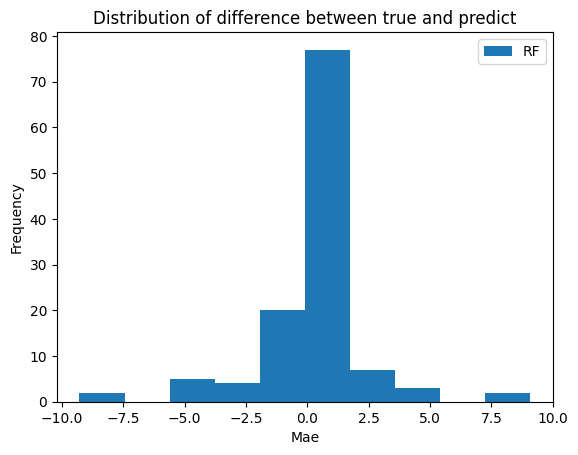

In [ ]:
plt.title('Distribution of difference between true and predict')
mae_vec = y_test - rfr.predict(X_test)
plt.hist(mae_vec, label = 'RF')
plt.legend()
plt.xlabel('Mae')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import graphviz
from sklearn import tree

In [ ]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1.2,1.2), dpi=700)
# tree.plot_tree(rfr.estimators_[0],
#                feature_names = fn,
#                class_names=cn,
#                filled = True, max_depth = 2);
# fig.savefig('rf_individualtree.png')

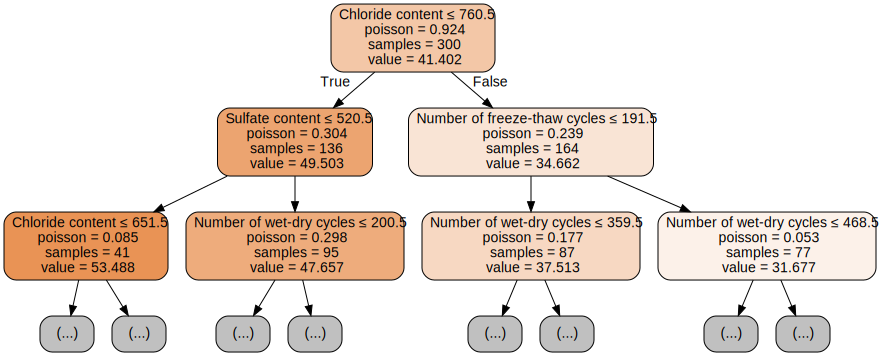

In [ ]:
fn=X_train.columns
cn='Прочность на сжатие, МПа'
dot_data = tree.export_graphviz(rfr[0], out_file=None,
                    feature_names=fn,
                      class_names=cn,
                      filled=True, rounded=True,
                      special_characters=True, max_depth = 2)
graph = graphviz.Source(dot_data)
graph

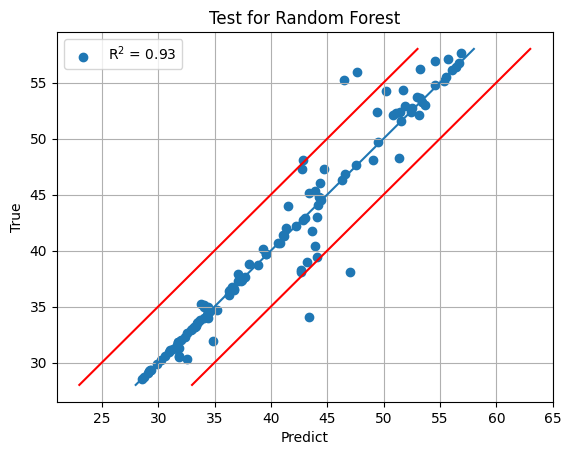

In [ ]:
plt.grid(True)

plt.title('Test for Random Forest')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(rfr.predict(X_test), y_test, label = 'R$^2$ = {}'.format(round(rf_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_rfr = pd.DataFrame()
scatter_rfr['True'] = y_test
scatter_rfr['Predict'] = rfr.predict(X_test)
scatter_rfr.to_csv('scatter_rfr.xlsx')

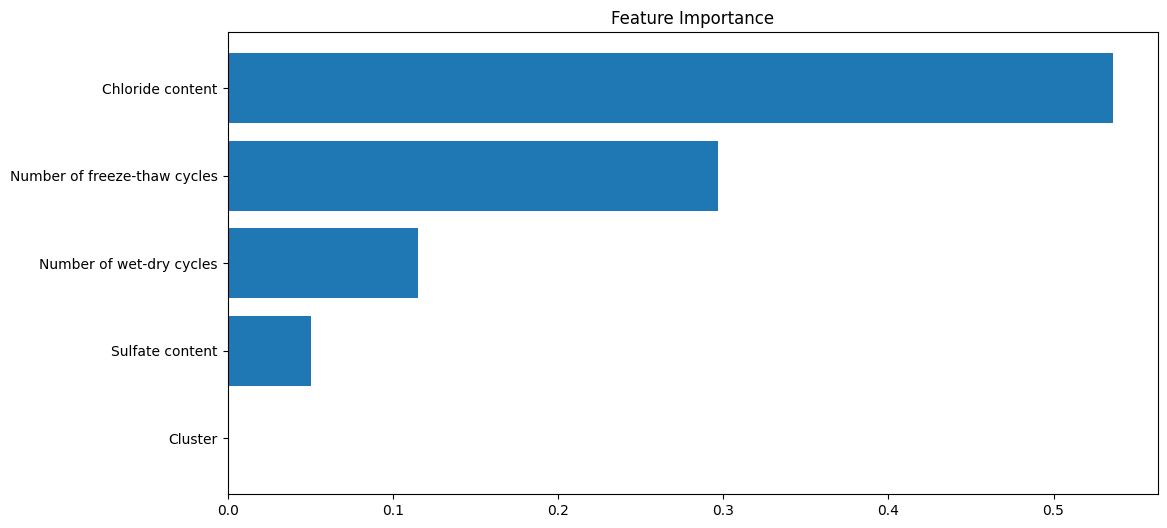

In [ ]:
feature_importance = rfr.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

# Kmeans + catboost

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)


clusters = KMeans(n_clusters = 4, random_state = 67).fit(X_train)
X_train['Cluster'] = clusters.predict(X_train)
X_test['Cluster'] = clusters.predict(X_test)
print(len(X_train))

480


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


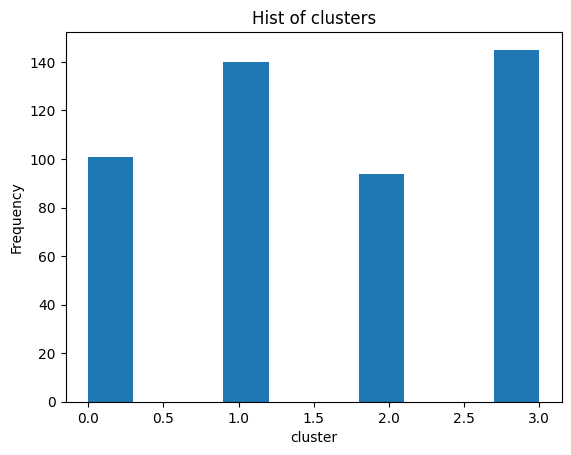

In [ ]:
plt.hist(X_train['cluster'])
plt.title('Hist of clusters')
plt.xlabel('cluster')
plt.ylabel('Frequency')

plt.show()

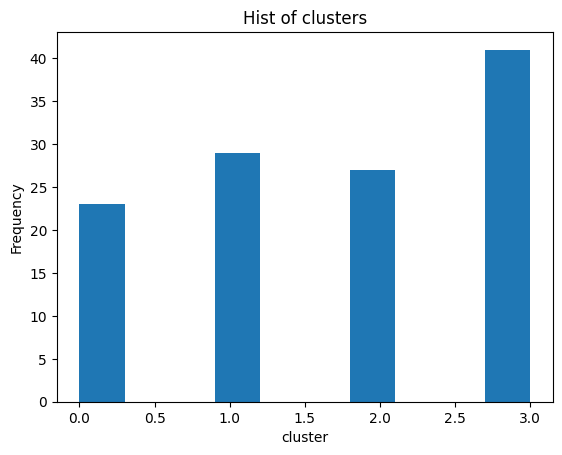

In [ ]:
plt.hist(X_test['cluster'])
plt.title('Hist of clusters')
plt.xlabel('cluster')
plt.ylabel('Frequency')

plt.show()

In [ ]:
X_train

,Number of freeze-thaw cycles,Chloride content,Sulfate content,Number of wet-dry cycles,cluster
№,,,,,
250,104,759,630.0,292,3
359,150,763,632.0,299,0
467,194,809,693.0,323,0
462,192,819,669.0,318,0
84,33,681,526.0,64,1
...,...,...,...,...,...
470,196,814,696.0,326,0
408,172,822,666.0,339,0
244,101,752,624.0,286,3


In [ ]:
def objective(trial):

    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)
    param = {
        'n_estimators' : trial.suggest_int("n_estimators", 100, 1500),
        'learning_rate':trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        'depth':trial.suggest_int("depth", 4, 10),
        'l2_leaf_reg':trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
       'bootstrap_type':trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        'random_strength':trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        'bagging_temperature':trial.suggest_float("bagging_temperature", 0.0, 10.0),
        'od_type':trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        'od_wait':trial.suggest_int("od_wait", 10, 50),
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cb = CatBoostRegressor(**param, loss_function='MAE')

    cb.fit(X_tr, y_tr, verbose=0, early_stopping_rounds=300)

    preds = cb.predict(X_val)
    score = mae(y_val, preds)

    return score

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

In [ ]:
# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# trial = optuna.trial.Trial(study, trial_id = 38)

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))


In [ ]:
cb = CatBoostRegressor(n_estimators = 1443,
    learning_rate = 0.03377629850679207,
    depth = 9,
    l2_leaf_reg = 14.360759119413357,
    bootstrap_type = 'Bayesian',
    random_strength = 5.041884312220626e-07,
    bagging_temperature = 0.6809968199319665,
    od_type = 'IncToDec',
    od_wait = 28, loss_function='MAE', verbose = 0)

In [ ]:
cb.fit(X_train, y_train)

In [ ]:
print(mae(cb.predict(X_train), y_train))

0.38070808807404466


In [ ]:
print(mae(cb.predict(X_test), y_test))

0.8903394303505984


In [ ]:
cat_mae = mae(cb.predict(X_test), y_test)
cat_mse = mse(cb.predict(X_test), y_test)
cat_rmse = np.sqrt(mse(cb.predict(X_test), y_test))
cat_mape =mape(cb.predict(X_test), y_test)
cat_r2 =r2(cb.predict(X_test), y_test)

In [ ]:
cb = CatBoostRegressor(verbose = 0, max_depth = 3)
cb.fit(X_train, y_train)

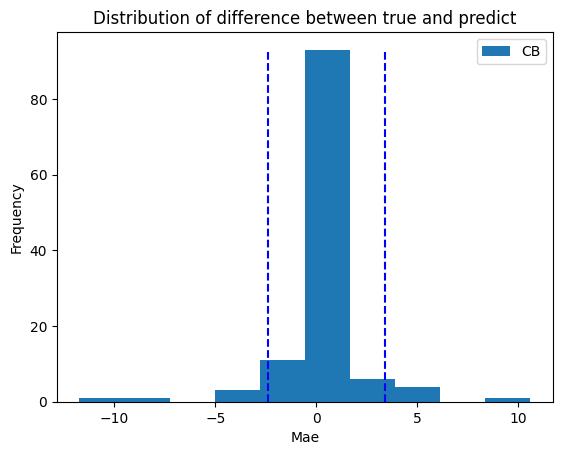

In [ ]:
plt.title('Distribution of difference between true and predict')
mae_vec = y_test - cb.predict(X_test)
plt.hist(mae_vec, label = 'CB')
np.percentile(mae_vec, 95)
plt.vlines(np.percentile(mae_vec, 5), ymin=0,ymax=93,linestyle='--', color = 'blue')
plt.vlines(np.percentile(mae_vec, 95), ymin=0,ymax=93,linestyle='--', color = 'blue')
plt.legend()
plt.xlabel('Mae')
plt.ylabel('Frequency')
plt.show()

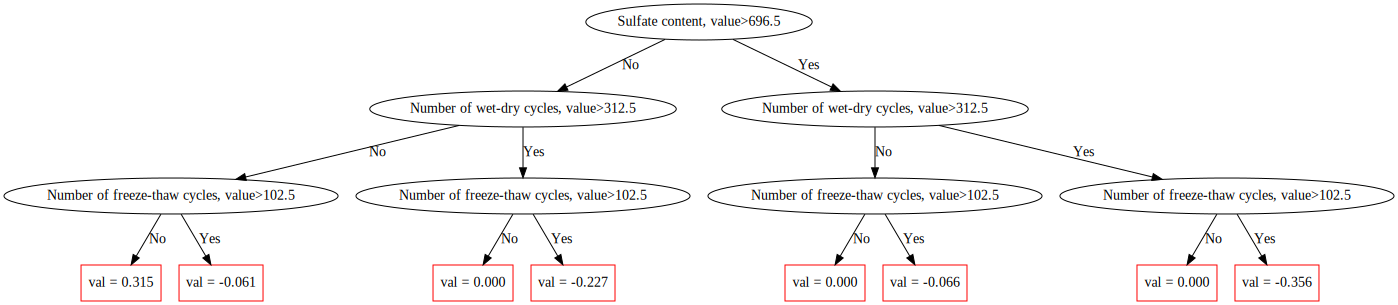

In [ ]:
cb.plot_tree(
    tree_idx=0,
    pool = pool
)

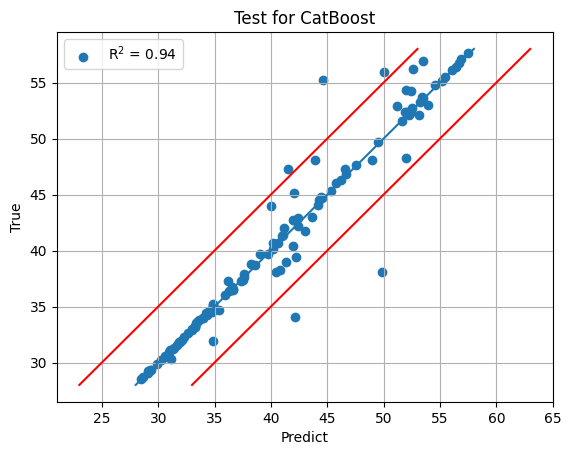

In [ ]:
plt.grid(True)

plt.title('Test for CatBoost')
plt.xlabel('Predict')
x = np.linspace(28, 58, 1000)
plt.ylabel('True')
plt.scatter(cb.predict(X_test), y_test, label = 'R$^2$ = {}'.format(round(cat_r2,2)))
plt.plot(x, x)

plt.plot(x + 5, x, color = 'r')
plt.plot(x + -5, x,  color = 'r')

plt.legend()
plt.show()

scatter_cb = pd.DataFrame()
scatter_cb['True'] = y_test
scatter_cb['Predict'] = cb.predict(X_test)
scatter_cb.to_csv('scatter_cb.xlsx')

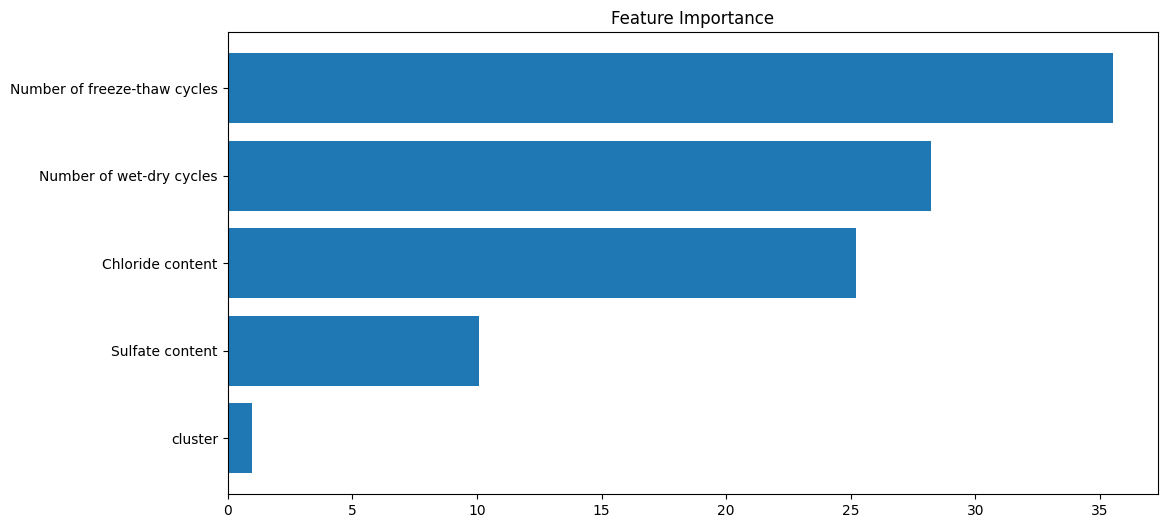

In [ ]:
feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

In [ ]:
from catboost import CatBoostClassifier, Pool


model = CatBoostRegressor(n_estimators = 1443,
    learning_rate = 0.03377629850679207,
    depth = 9,
    l2_leaf_reg = 14.360759119413357,
    bootstrap_type = 'Bayesian',
    random_strength = 5.041884312220626e-07,
    bagging_temperature = 0.6809968199319665,
    od_type = 'IncToDec',
    od_wait = 28, loss_function='MAE', verbose = 0)

model.fit(X_train,
       y_train,
       verbose=False,
       plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
train_stat = pd.read_csv('/content/catboost_info/learn_error.tsv', sep = '\t')

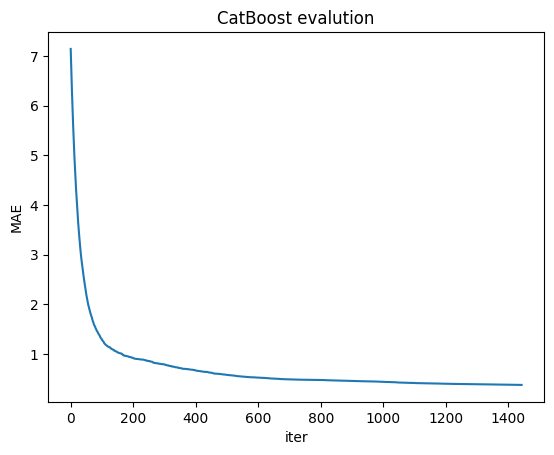

In [ ]:
plt.title('CatBoost evalution')
plt.xlabel('iter')
plt.ylabel('MAE')
plt.plot(train_stat['iter'], train_stat['MAE'])

In [ ]:
train_stat.to_excel('train_cat.xlsx')

# Model Inference

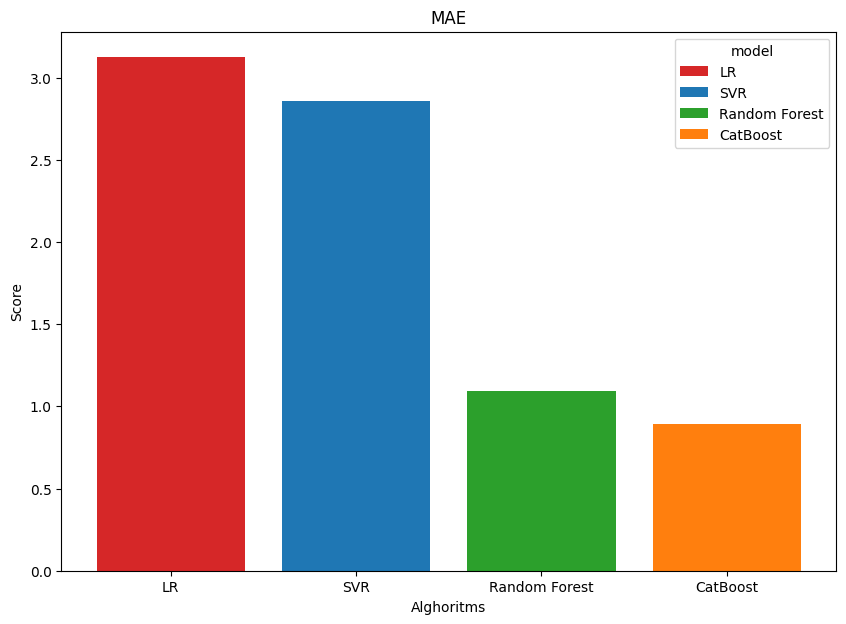

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

fruits = ['CatBoost', 'Random Forest', 'SVR', 'LR'][::-1]
bar_labels = ['CatBoost', 'Random Forest', 'SVR', 'LR'][::-1]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
counts = [cat_mae, rf_mae, svr_mae, linear_mae][::-1]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MAE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

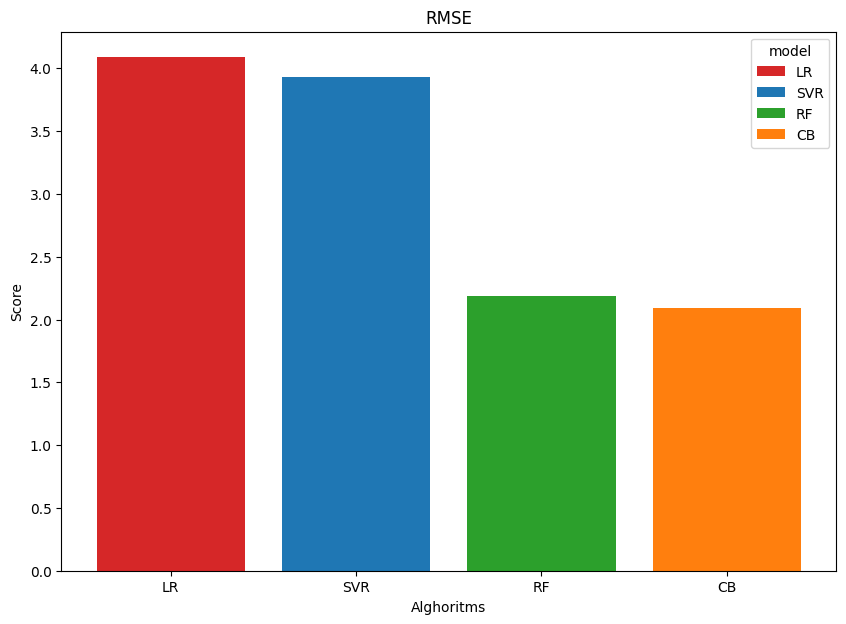

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

counts = [cat_rmse, rf_rmse, svr_rmse, linear_rmse][::-1]
fruits = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_labels = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('RMSE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

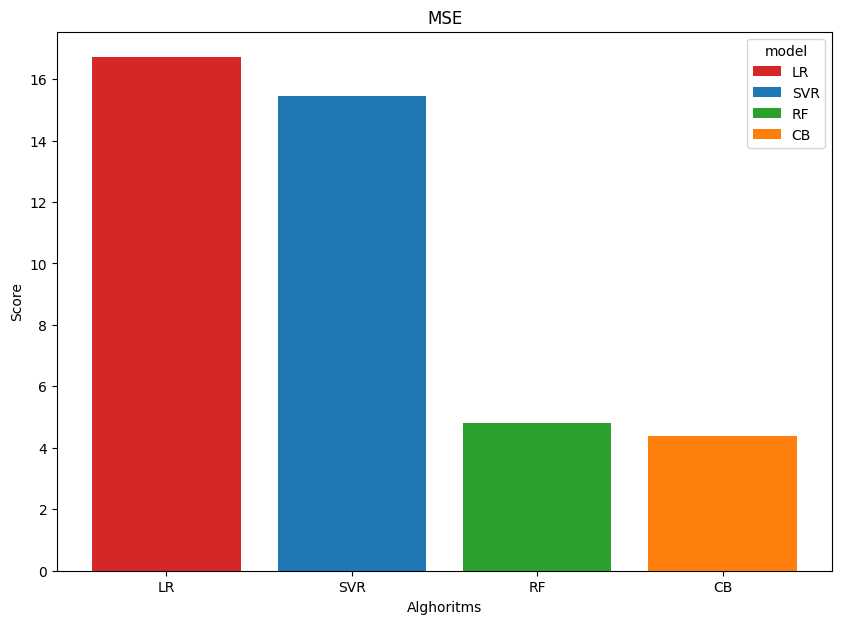

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

counts = [cat_mse, rf_mse, svr_mse, linear_mse][::-1]
fruits = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_labels = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MSE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

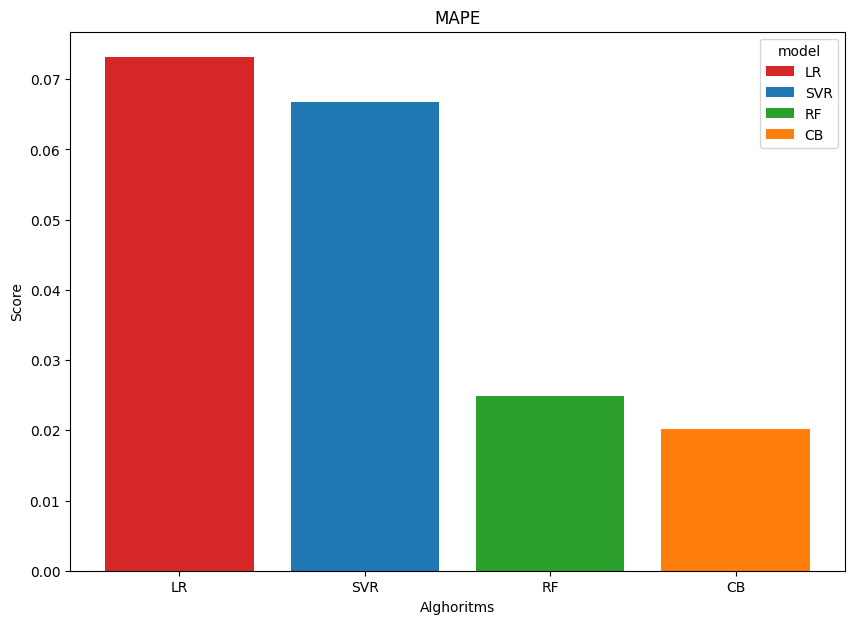

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

counts = [cat_mape, rf_mape, svr_mape, linear_mape][::-1]
fruits = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_labels = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('MAPE')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

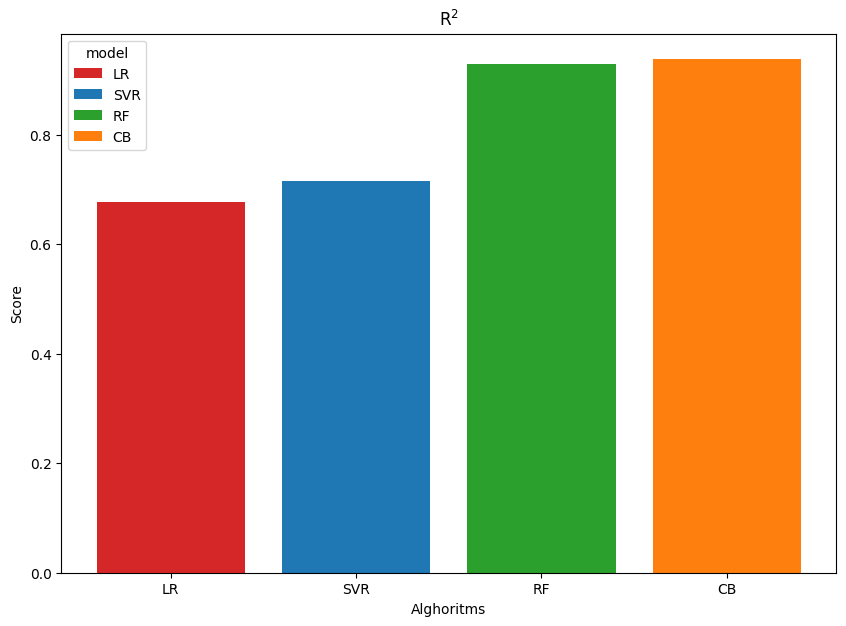

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

counts = [cat_r2, rf_r2, svr_r2, linear_r2][::-1]
fruits = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_labels = ['CB', 'RF', 'SVR', 'LR'][::-1]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_title('R$^2$')

ax.set_ylabel('Score')
ax.set_xlabel('Alghoritms')
ax.legend(title='model')

plt.show()

In [ ]:
mertrics = pd.DataFrame()
mertrics['alg'] = ['cat', 'rfr', 'svr', 'lr']
mertrics['mae'] = [cat_mae, rf_mae, svr_mae, linear_mae]
mertrics['rmse'] = [cat_rmse, rf_rmse, svr_rmse, linear_rmse]
mertrics['mse'] = [cat_mse, rf_mse, svr_mse, linear_mse]
mertrics['mape'] = [cat_mape, rf_mape, svr_mape, linear_mape]
mertrics['r2'] = [cat_r2, rf_r2, svr_r2, linear_r2]

In [ ]:
mertrics.to_excel('metrics_final_regression.xlsx')